In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime as dt

In [2]:
btc = pd.read_csv('Data/coin_Bitcoin.csv')
btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


# Preprocessing

In [4]:
btc = btc.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap'], axis=1)
btc.head()

,Date,Close,Volume
0,2013-04-29 23:59:59,144.539993,0.0
1,2013-04-30 23:59:59,139.000000,0.0
2,2013-05-01 23:59:59,116.989998,0.0
3,2013-05-02 23:59:59,105.209999,0.0
4,2013-05-03 23:59:59,97.750000,0.0


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

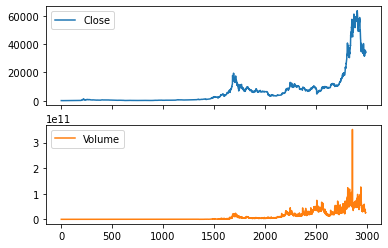

In [5]:
btc.plot(subplots=True)


In [6]:
btc = btc.drop('Volume',1)

In [7]:
btc['Date'] = btc['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d %H:%M:%S'))
btc.head()

,Date,Close
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000


In [8]:
btc.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [9]:
prophet_btc = btc.rename(columns={'Date':'ds','Close':'y'})

In [10]:
prophet_btc

,ds,y
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000
...,...,...
2986,2021-07-02 23:59:59,33897.048590
2987,2021-07-03 23:59:59,34668.548402
2988,2021-07-04 23:59:59,35287.779766
2989,2021-07-05 23:59:59,33746.002456


# Prophet ML Model

In [11]:
m = Prophet()
m.fit(prophet_btc)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3351,2022-07-02 23:59:59
3352,2022-07-03 23:59:59
3353,2022-07-04 23:59:59
3354,2022-07-05 23:59:59
3355,2022-07-06 23:59:59


In [14]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3351,2022-07-02 23:59:59,66179.561541,59148.233493,73612.539391
3352,2022-07-03 23:59:59,66245.255164,59058.607017,73881.609289
3353,2022-07-04 23:59:59,66349.691406,59567.626820,73574.026883
3354,2022-07-05 23:59:59,66449.262728,59200.066009,74160.292572
3355,2022-07-06 23:59:59,66574.573487,59289.036191,74010.095604


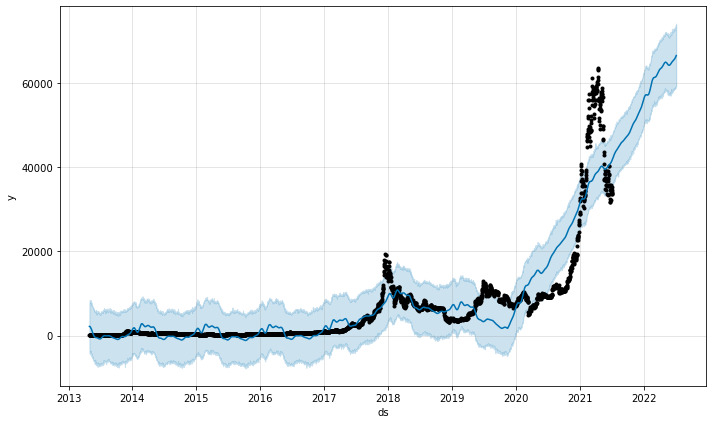

In [15]:
fig1 = m.plot(forecast)

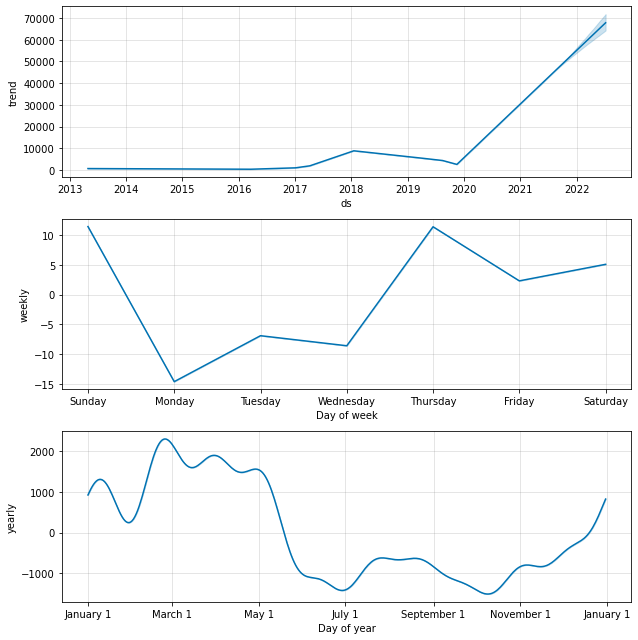

In [16]:
fig2 = m.plot_components(forecast)